# Import required libraries

In [22]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import sys

# Load the data

In [2]:
#Load CSV file
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [17]:
#verify the data
print("checking first 5 rows of the dataset :->\n",data.head())
print("\t")
print("Checking missing values:->\n", data.isna().sum())
print("\t")
print("Description of the data :->\n", data.describe())

checking first 5 rows of the dataset :->
    Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
	
Checking missing values:->
 Hours     0
Scores    0
dtype: int64
	
Description of the data :->
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [4]:
X=data.iloc[:,0].values
y=data.iloc[:,1].values

# As we need 2D Input

In [18]:
X=X.reshape(-1,1)

In [19]:
#checking size of data
print(data.shape)
print(X.shape)
print(y.shape)

(25, 2)
(25, 1)
(25,)


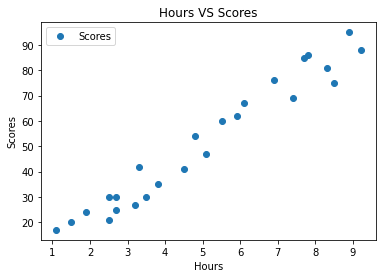

In [20]:
data.plot(x='Hours',y="Scores",style='o')
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

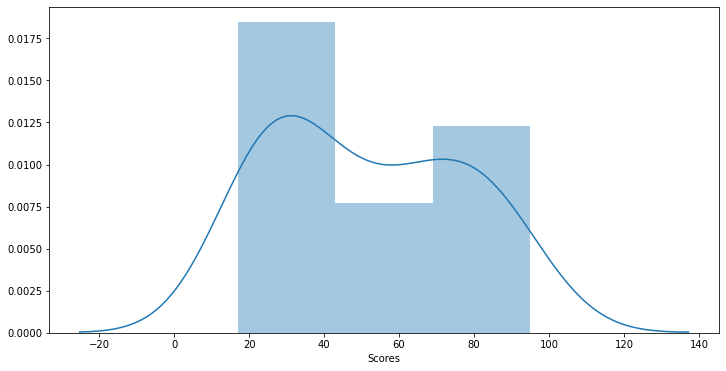

In [23]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.distplot(data['Scores'])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=12)

In [130]:
regression=LinearRegression()
regression.fit(X_train,y_train)#training the algorithm

LinearRegression()

In [131]:
print(X_test)
y_pred=regression.predict(X_test)
print(y_pred)

[[7.4]
 [5.5]
 [6.1]
 [5.1]
 [8.9]
 [8.3]
 [3.5]
 [1.1]]
[74.97365707 56.40147769 62.26637644 52.49154519 89.63590396 83.7710052
 36.85181518 13.39222016]


In [132]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [133]:
df

,Actual,Predicted
0,69,74.973657
1,60,56.401478
2,67,62.266376
3,47,52.491545
4,95,89.635904
5,81,83.771005
6,30,36.851815
7,17,13.392220


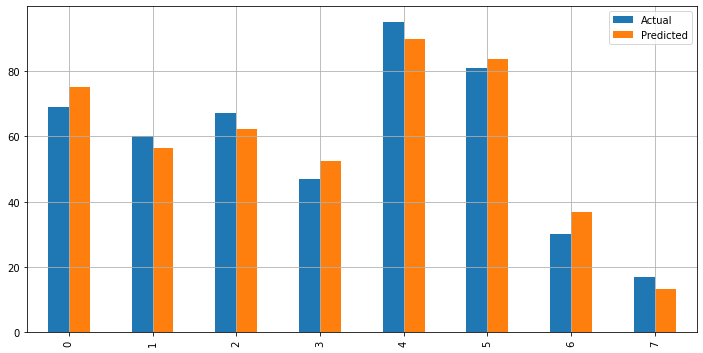

In [134]:
df.plot(kind='bar',figsize=(12,6))
plt.grid(b=None,which='major',ls="-")
plt.grid(b=None,which='minor',ls=":")
plt.show()

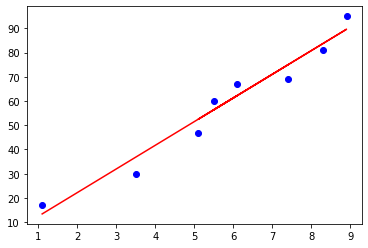

In [135]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.show()

# Evaluating the Model

Here, we will calculate following metrics of evaluation for test data and see how well is our model performing.

1.Mean Absolute Error (MAE)
2.Mean Squared Error (MSE)
3.Root Mean Squared Error (RMSE)
4.Coefficient of determination (R2 score)

In [136]:
print("Mean Absolute Error (MAE): ",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Co-efficient of determination (R2 Score): ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE):  4.79900554865473
Mean Squared Error (MSE):  24.701705618997114
Root Mean Squared Error(RMSE):  4.9700810475280095
Co-efficient of determination (R2 Score):  0.9578604019720702


The Mean square error should be as close to zero as possible and the R2 Score should be as close as to 1 as possible. Since this is a simple task, the results are extremely satisfying. But in most cases it takes time and effort to figure the right hyper-parameters which give the best performance.

In [137]:
hours= 9.25
new_pred=regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.057094895472


Slope : [9.77483126]
Intercept : 2.639905784194255


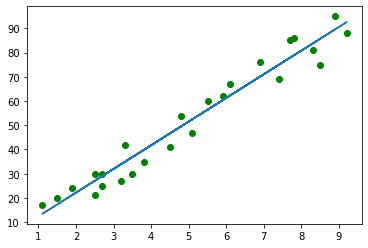

In [138]:
line=regression.coef_*X+regression.intercept_
print('Slope :', regression.coef_)
print('Intercept :',regression.intercept_)
plt.scatter(X,y,color='green')
plt.plot(X,line)
plt.show()

In [139]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regression, X_train, y_train, cv= 5)
print(scores)

[0.92277324 0.90631551 0.76125424 0.83421931 0.973091  ]


In [143]:
print("Accuracy :-",regression.score(X_test,y_test)*100)

Accuracy :- 95.78604019720703


# Predicting over the train set

In [146]:
# Predicting over the Train Set and calculating error
train_predict = regression.predict(X_train)
#k = mae(train_predict, train_y)
print("Mean Absolute Error (MAE)_train_data: ",metrics.mean_absolute_error(train_predict, y_train))
print("Mean Squared Error (MSE)_train_data: ", metrics.mean_squared_error(train_predict, y_train))
print("Root Mean Squared Error(RMSE)_train_data: ",np.sqrt(metrics.mean_squared_error(train_predict, y_train)))
print("Co-efficient of determination (R2 Score)_train_data: ", metrics.r2_score(train_predict, y_train))
#print('Training Mean Absolute Error', k )
#Training Mean Absolute Error 822.5458775969962

Mean Absolute Error (MAE)_train_data:  5.027474784795328
Mean Squared Error (MSE)_train_data:  30.883971112115987
Root Mean Squared Error(RMSE)_train_data:  5.557334892924484
Co-efficient of determination (R2 Score)_train_data:  0.9452668850918335


# Predicting over the test set

In [147]:
# Predicting over the Test Set and calculating error
test_predict = regression.predict(X_test)
print("Mean Absolute Error (MAE)_test_data: ",metrics.mean_absolute_error(test_predict, y_test))
print("Mean Squared Error (MSE)_test_data: ", metrics.mean_squared_error(test_predict, y_test))
print("Root Mean Squared Error(RMSE)_test_data: ",np.sqrt(metrics.mean_squared_error(test_predict, y_test)))
print("Co-efficient of determination (R2 Score)_test_data: ", metrics.r2_score(test_predict, y_test))

Mean Absolute Error (MAE)_test_data:  4.79900554865473
Mean Squared Error (MSE)_test_data:  24.701705618997114
Root Mean Squared Error(RMSE)_test_data:  4.9700810475280095
Co-efficient of determination (R2 Score)_test_data:  0.9554633168683844


In [2]:
import os
os.getcwd()

'C:\\Users\\Nabin Gope'